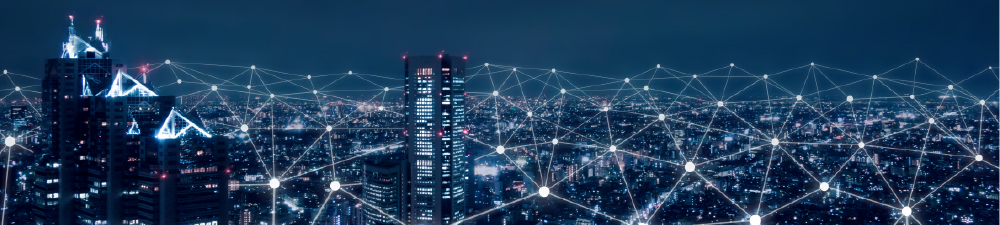

# Mini Project 2 - IU 4.5 Statistical Analysis

## Packages and setup

In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import os

from scipy.stats import shapiro
import scipy.stats as stats

#parameter settings
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
# import warnings
# warnings.filterwarnings("ignore")
# warnings.simplefilter(action='ignore', category=FutureWarning)

### Reading data and initial processing

In [4]:
# read the df
user_df = pd.read_csv("Mini_project_2_Data.xls")

In [5]:
# preview the data
user_df.head(10)

,userid,version,sum_gamerounds,retention_1,retention_7
0,116,gate_30,3,False,False
1,337,gate_30,38,True,False
2,377,gate_40,165,True,False
3,483,gate_40,1,False,False
4,488,gate_40,179,True,True
5,540,gate_40,187,True,True
6,1066,gate_30,0,False,False
7,1444,gate_40,2,False,False
8,1574,gate_40,108,True,True
9,1587,gate_40,153,True,False


In [7]:
user_df['version'].value_counts()

gate_40    45489
gate_30    44700
Name: version, dtype: int64

|Variables | Variable description|
| :--- | :--- |
|User ID | a unique number that identifies each player|
|version |whether the player was put in the control group A (gate_30 - a gate at level 30) or the test group B (gate_40 - a gate at level 40)|
|sum_gamerounds |the number of game rounds played by the player during the first week after installation|
|retention_1 |did the player come back and play 1 day after installing?|
|retention_7 |did the player come back and play 7 days after installing?|

In [8]:
# basic info
user_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90189 entries, 0 to 90188
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   userid          90189 non-null  int64 
 1   version         90189 non-null  object
 2   sum_gamerounds  90189 non-null  int64 
 3   retention_1     90189 non-null  bool  
 4   retention_7     90189 non-null  bool  
dtypes: bool(2), int64(2), object(1)
memory usage: 2.2+ MB


## Exercise

## Q1. Detect and resolve problems in the data (Missing value, Outliers, etc.)

### Q1.1 Identify missing value

In [11]:
#Check for any missing values in the data using isnull() function
user_df.isnull().sum()

userid            0
version           0
sum_gamerounds    0
retention_1       0
retention_7       0
dtype: int64

#### There's no missing values in any columns

### Q1.2 Identify outliers

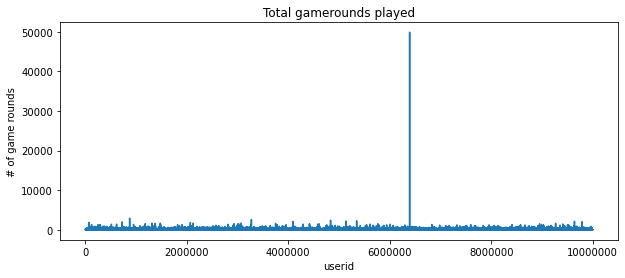

In [12]:
#Check for outlier values in sum_gamerounds column
plt.figure(figsize=(10,4))

plt.title("Total gamerounds played")
plt.ticklabel_format(style='plain') # shows userid as is
plt.ylabel("# of game rounds")
sns.lineplot(data=user_df, x = 'userid', y = 'sum_gamerounds');

#### It shows that there's one userid as an extreme outlier. probably using bot

In [13]:
#Based on the plot, check the few largest sum_gamerounds to identify the index

user_df.nlargest(10, 'sum_gamerounds')


,userid,version,sum_gamerounds,retention_1,retention_7
57702,6390605,gate_30,49854,False,True
7912,871500,gate_30,2961,True,True
29417,3271615,gate_40,2640,True,False
43671,4832608,gate_30,2438,True,True
48188,5346171,gate_40,2294,True,True
46344,5133952,gate_30,2251,True,True
87007,9640085,gate_30,2156,True,True
36933,4090246,gate_40,2124,True,True
88328,9791599,gate_40,2063,True,True
6536,725080,gate_40,2015,True,True


In [14]:
# remove outlier row and assign to a new df
df_no_outlier = user_df.drop(57702, axis = 0)


In [15]:
# confirm that the outliers are removed
df_no_outlier.nlargest(10, 'sum_gamerounds')

,userid,version,sum_gamerounds,retention_1,retention_7
7912,871500,gate_30,2961,True,True
29417,3271615,gate_40,2640,True,False
43671,4832608,gate_30,2438,True,True
48188,5346171,gate_40,2294,True,True
46344,5133952,gate_30,2251,True,True
87007,9640085,gate_30,2156,True,True
36933,4090246,gate_40,2124,True,True
88328,9791599,gate_40,2063,True,True
6536,725080,gate_40,2015,True,True
655,69927,gate_30,1906,True,True


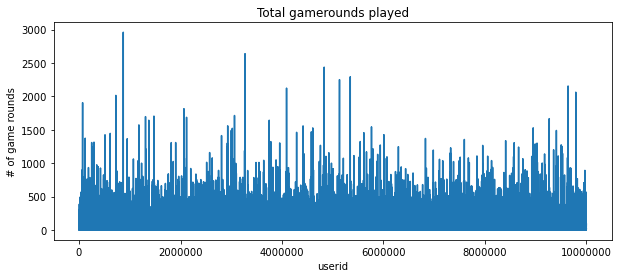

In [16]:
# Plot the graph for sum_gamerounds player after removing the outlier
# the distribution should look more reasonable
plt.figure(figsize=(10,4))

plt.title("Total gamerounds played")
plt.ticklabel_format(style='plain')
plt.ylabel("# of game rounds")
sns.lineplot(data=df_no_outlier, x = 'userid', y = 'sum_gamerounds');

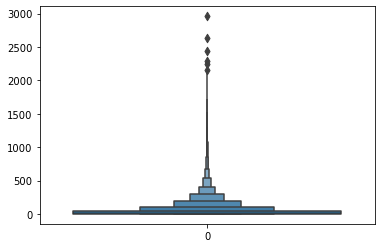

In [17]:
sns.boxenplot(data= df_no_outlier['sum_gamerounds']);

# there's still a spread, but not as extreme

<Figure size 360x360 with 0 Axes>

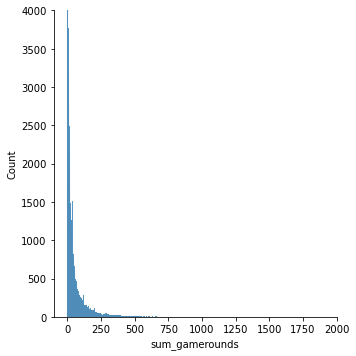

In [18]:
# check the distribution of the sum_gamerounds

plt.figure(figsize=(5,5))

sns.displot(data=df_no_outlier['sum_gamerounds'])
plt.xlim(-100, 2000)
plt.ylim(0,4000);

## Q2. Plot summary statistics and identify trends to answer basis business questions

### Q2.1 What is the overall 7-day retention rate of the game?

In [20]:
# Calculate the percentage of player retaned after 7 days

retention_rate_7 = df_no_outlier['retention_7'].sum() / len(df_no_outlier) * 100 # in percent
retention_rate_7 = np.round(retention_rate_7, 2)

print(f"Overall 7 days retention rate of the game for both versions is: {retention_rate_7}%")


Overall 7 days retention rate of the game for both versions is: 18.61%


### Q2.2 How many players never played the game after installing? 

In [21]:
# Find number of customers with sum_gamerounds is equal to zero
gamerounds_0 = (df_no_outlier['sum_gamerounds'] == 0).sum()


print(f"The number of players who have never played the game after installing: {gamerounds_0}")

The number of players who have never played the game after installing: 3994


### Q2.3 Does the number of users decrease as the level progresses highlighting the difficulty of the game?

In [23]:
# Group by sum_gamerounds and count the number of users for the first 200 gamerounds
# exclude those with 0 gamerounds since they technically have not played the game yet

first_200_usercount = df_no_outlier.groupby(by='sum_gamerounds').count().iloc[1:201]
first_200_usercount = first_200_usercount.drop(['retention_1', 'retention_7', 'version'], axis=1)



first_200_usercount


,userid
sum_gamerounds,
1,5538
2,4606
3,3958
4,3629
5,2992
...,...
196,46
197,39
198,37


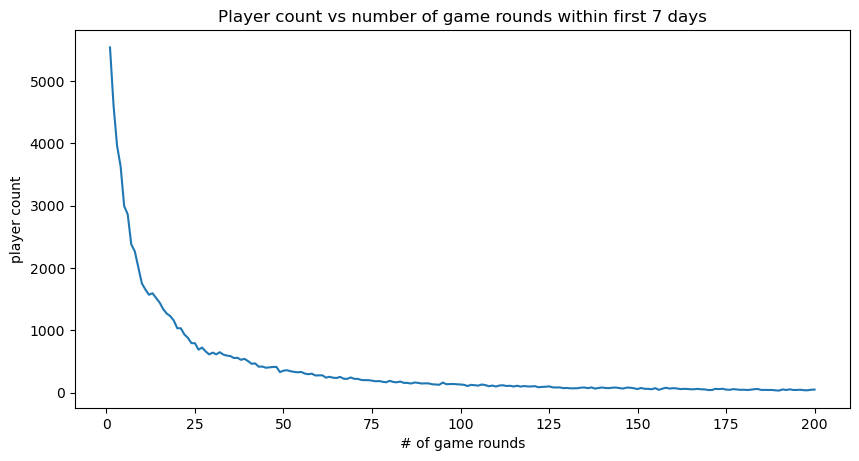

In [24]:
# Use plot() function on the summarized stats to visualize the chart

plt.figure(figsize = (10,5), dpi = 100)
plt.title("Player count vs number of game rounds within first 7 days")
plt.ylabel("player count")
plt.xlabel("# of game rounds")
sns.lineplot(data=first_200_usercount, x = 'sum_gamerounds', y = 'userid');



Based on the plotted chart, it can be seen that the number of users decreased as the number of gamerounds progressed. In other words, as the game became more difficult in higher levels, less users continued to play the game.

_Note: since we are interested in the first 200 rounds, round 0 is not included in this chart since that would mean that the users did not play a single round of the game._

## Q3. Generate crosstab for two groups of players to understand if there is a difference in 7 days retention rate & total number of game rounds played

### Q3.1 Seven days retention rate summary for different game versions

In [25]:
# Create cross tab for game version and retention_1 flag 
# counting number of users for each possible categories

pd.crosstab(df_no_outlier.version, df_no_outlier.retention_1).apply(lambda r: r/r.sum(), axis=1)

retention_1,False,True
version,,
gate_30,0.551802,0.448198
gate_40,0.557717,0.442283


In [26]:
# create cross tab for retention 7

pd.crosstab(df_no_outlier.version, df_no_outlier.retention_7).apply(lambda r: r/r.sum(), axis=1)

retention_7,False,True
version,,
gate_30,0.809817,0.190183
gate_40,0.818000,0.182000


<mark>__Analysis Results:__
    
From the cross tab observations, there is only a marginal 0.82% (19.02%-18.20%) higher value for gate_30's 7-days retention rate as compared to gate_40's, and a corresponding marginal 0.59% (44.82%-44.23%) higher value for gate_30's 1-day retention rate as compared to gate_40's. As both differences are less than 1%, we cannot conclude if the higher retention rates for gate_30 are statistically significant.

### Q3.2 Gamerounds summary for different game versions

In [27]:
#use pandas group by to calculate average game rounds played summarized by different versions

df_no_outlier.groupby(by='version').mean().drop(['retention_1', 'retention_7', 'userid'], axis =1)


,sum_gamerounds
version,
gate_30,51.342111
gate_40,51.298776


<mark>__Analysis Results:__
    
From observation, the gate_30 version enjoys a marginally higher average game rounds played per user by 0.04 rounds (51.34-51.30).
Due to the tiny marginal difference, we cannot conclude if the higher average game rounds for gate_30 version is statistically significant.

## Q4. Perform two-sample test for groups A and B to test statistical significance amongst the groups in the sum of game rounds played i.e., if groups A and B are statistically different

### Initial data processing
Split data into A and B group based on game version

**Group_A (control, gate_30)
vs
Group_B (treatment, gate_40)**

In [28]:
# Add new column to indicate A (control, gate_30) vs B (treatment, gate_40)

df_no_outlier["version_ab"] = df_no_outlier['version'].map({'gate_30':'A', 'gate_40':'B'})

In [29]:
# split the data into group A and B
group_A = df_no_outlier[df_no_outlier['version_ab'] == 'A'].copy()
group_B = df_no_outlier[df_no_outlier['version_ab'] == 'B'].copy()

In [30]:
group_A.head()

,userid,version,sum_gamerounds,retention_1,retention_7,version_ab
0,116,gate_30,3,False,False,A
1,337,gate_30,38,True,False,A
6,1066,gate_30,0,False,False,A
11,2101,gate_30,0,False,False,A
13,2179,gate_30,39,True,False,A


In [31]:
group_B.head()

,userid,version,sum_gamerounds,retention_1,retention_7,version_ab
2,377,gate_40,165,True,False,B
3,483,gate_40,1,False,False,B
4,488,gate_40,179,True,True,B
5,540,gate_40,187,True,True,B
7,1444,gate_40,2,False,False,B


### Q4.1 Shapiro test of Normality

In [32]:
#---------------------- Shapiro Test ----------------------
# NULL Hypothesis H0: Distribution is normal
# ALTERNATE Hypothesis H1: Distribution is not normal    

#test for group_A
stats.shapiro(group_A['sum_gamerounds'])


C:\Users\Wanyan\anaconda3\lib\site-packages\scipy\stats\morestats.py:1681: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


ShapiroResult(statistic=0.48864424228668213, pvalue=0.0)

In [33]:
#test for group_B
stats.shapiro(group_B['sum_gamerounds'])

ShapiroResult(statistic=0.4825654625892639, pvalue=0.0)

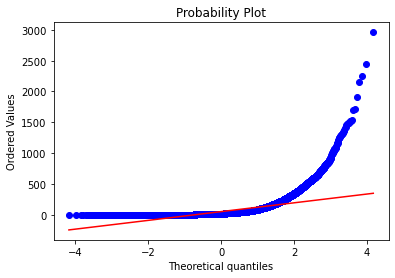

In [34]:
# try plotting normal QQ plot

stats.probplot(group_A['sum_gamerounds'], plot=sns.mpl.pyplot);


<mark>__Analsysis Results:__
    
__Type your answer here:__ Analyze and interpret the results of shapiro test of normality i.e. are the two groups normally distributed?
       
The p-values for both groups A and B are 0.0% for the Shapiro test. Using an alpha level of 0.05, both p-values are less than the significance level. Also the normal QQ plot doesn't show any semblance of normality. 

Thus, we can reject the null hypothesis and conclude that the distribution of sum_gamerounds in both Group A and B are NOT normally distributed

### Q4.2 Test of homegienity of variance

In [35]:
#---------------------- Levene's Test ----------------------
# NULL Hypothesis H0: Two groups have equal variances
# ALTERNATE Hypothesis H1: Two groups do not have equal variances

#perform levene's test and accept or reject the null hypothesis based on the results
stats.levene(group_A['sum_gamerounds'], group_B['sum_gamerounds'], center='median')



LeveneResult(statistic=0.07510153837481241, pvalue=0.7840494387892463)

In [36]:
# Compute each group's std normally
group_A['sum_gamerounds'].std()

102.05759789214098

In [37]:
group_B['sum_gamerounds'].std()

103.29441621653784

<mark>__Analysis Results:__
    
__Type your answer here:__ Write your final recommendation from the results of Levene's test
    
    
Using an alpha level of 0.05, the p-value for the Levene's Test (0.784) is greater than the significance level. Therefore, we fail to reject the null hypothesis, and the variances from both groups are viewed to be equal.

### Q4.3 Test of significance: Two sample test

In [88]:
#---------------------- Two samples test ----------------------
# NULL Hypothesis H0: Two samples are equal
# ALTERNATE Hypothesis H1: Two samples are different

#Apply relevant two sample test to accept or reject the NULL hypothesis
# use TWO SAMPLE T-TEST for now

In [38]:
# t- test fitting
t_score, p_value = stats.ttest_ind(group_A['sum_gamerounds'], group_B['sum_gamerounds'])

print(f't_score is {t_score}')
print(f'p_value is {p_value}')

t_score is 0.0633675766982082
p_value is 0.9494739458256001


<mark>__Analsysis Results:__
    
__Type your answer here:__ Write your final recommendation from the results of two sample hyothesis testing ??

Since the P-value is really high of 0.949 (>> 0.05), we **fail to reject the Null hypothesis**, and thus conclude there is no significant difference between the control (Group A, gate_30) and treatment (Group B, gate_40)

## Q5. Based on significance testing results, if groups A and B are statistically different, which level has more advantage in terms of player retention and number of game rounds played

In [39]:
# Analyze the 1 day and 7 days retention rate for two different groups using group by function
df_no_outlier.groupby('version').mean().drop('userid', axis = 1)


,sum_gamerounds,retention_1,retention_7
version,,,
gate_30,51.342111,0.448198,0.190183
gate_40,51.298776,0.442283,0.182000


In [42]:
from statsmodels.stats.proportion import proportions_ztest

# can we assume anything from our sample
significance = 0.05
group_A_success = (group_A['retention_1']==True).sum()
group_B_success = (group_B['retention_1']==True).sum()
group_A_total = group_A['retention_1'].count()
group_B_total = group_B['retention_1'].count()

sample_success_a, sample_size_a = (group_A_success, group_A_total)
sample_success_b, sample_size_b = (group_B_success, group_B_total)
# check our sample against Ho for Ha > Ho
successes = np.array([sample_success_a, sample_success_b])
samples = np.array([sample_size_a, sample_size_b])
# note, no need for a Ho value here - it's derived from the other parameters
stat, p_value = proportions_ztest(count=successes, nobs=samples,  alternative='larger')
# report
print('z_stat: %0.3f, p_value: %0.3f' % (stat, p_value))
if p_value > significance:
   print ("Fail to reject the null hypothesis that retention_1 in group A is smaller or equal to group B")
else:
   print ("Reject the null hypothesis that retention_1 in group A is smaller or equal to group B - suggest the alternative hypothesis is true")

z_stat: 1.787, p_value: 0.037
Reject the null hypothesis that retention_1 in group A is smaller or equal to group B - suggest the alternative hypothesis is true


In [41]:
# can we assume anything from our sample
significance = 0.05
group_A_success = (group_A['retention_7']==True).sum()
group_B_success = (group_B['retention_7']==True).sum()
group_A_total = group_A['retention_7'].count()
group_B_total = group_B['retention_7'].count()

sample_success_a, sample_size_a = (group_A_success, group_A_total)
sample_success_b, sample_size_b = (group_B_success, group_B_total)
# check our sample against Ho for Ha > Ho
successes = np.array([sample_success_a, sample_success_b])
samples = np.array([sample_size_a, sample_size_b])
# note, no need for a Ho value here - it's derived from the other parameters
stat, p_value = proportions_ztest(count=successes, nobs=samples,  alternative='larger')
# report
print('z_stat: %0.3f, p_value: %0.3f' % (stat, p_value))
if p_value > significance:
   print ("Fail to reject the null hypothesis that retention_7 in group A is smaller or equal to group B. - we have nothing else to say")
else:
   print ("Reject the null hypothesis that retention_7 in group A is smaller or equal to group B - suggest the alternative hypothesis is true")

z_stat: 3.157, p_value: 0.001
Reject the null hypothesis that retention_7 in group A is smaller or equal to group B - suggest the alternative hypothesis is true


<mark>__Analsysis Results:__
    
__Type your answer here:__ Write your final recommendation to the company regarding which level works best as the first gate  - Level 30 or Level 40
    
Given that the sample size is large, the power of the test is very strong and able to detect a difference if there is. We proceed to do T test for game rounds and z tests for retention_1 and retention_7.

T tests for game rounds for group A and group B:

Based on the T test results for difference in sum of game rounds played, we concluded that since the P-value is really high of 0.949 (>> 0.05), we fail to reject the Null hypothesis and fail to reject that group A and B statistically have the same average game rounds played. Hence we conclude that it is highly unlikely to have differences in terms of number of game rounds played even when the first gate level is moved from level 30 to level 40.

Z tests for retention rate_1 for group A and group B:

Based on the Z test results for improvement in retention rate 1, H0: GroupA_R1<= GroupB_R1, H1: GroupA_R1>GroupB_R1. We concluded that we reject the Null hypothesis and reject that group A retention rate_1 is smaller or equal to group B. Hence we conclude that it is likely to have higher retention rate 1 if first gate level remains at level 30 and not moved to level 40. Day 1 retention rate deterioriates when level is moved from level 30 to level 40.

Z tests for retention rate_7 for group A and group B:

Based on the Z test results for difference in retention rate 7, H0: GroupA_R7<= GroupB_R7, H1: GroupA_R7>GroupB_R7, we concluded that we reject the Null hypothesis and reject that group A retention rate_7 is smaller or equal to group B. Hence we conclude that it is likely to have higher retention rate 7 if first gate level remains at level 30 and not moved to level 40. Day 7 retention rate deterioriates when level is moved from level 30 to level 40.

Conclusions

We recommend not to move the gate from level 30 to level 40 given that the day 1 and day 7 retention rates are likely to deterioriate at the population level.

## Q6. [Bonus Question]  Using bootstrap resampling, plot the retention rate distribution for both the groups inorder to visualize effect of different version of the game on retention.

In [43]:
# view group A and B
group_A.head()

,userid,version,sum_gamerounds,retention_1,retention_7,version_ab
0,116,gate_30,3,False,False,A
1,337,gate_30,38,True,False,A
6,1066,gate_30,0,False,False,A
11,2101,gate_30,0,False,False,A
13,2179,gate_30,39,True,False,A


In [44]:
group_B.head()

,userid,version,sum_gamerounds,retention_1,retention_7,version_ab
2,377,gate_40,165,True,False,B
3,483,gate_40,1,False,False,B
4,488,gate_40,179,True,True,B
5,540,gate_40,187,True,True,B
7,1444,gate_40,2,False,False,B


In [45]:
# create a function to perform bootstrapping

def bootstrap(ser, fraction, n_loop):
    '''
    takes in a series, take a fraction of sample, compute the sample mean,
    loop n times, return a series of the n number of sample means
    '''
    
    # set temp var
    mean_ser = pd.Series(dtype='float')
    mean_val = 0.0
    
    # do sampling for n_loop times
    for n in range(n_loop):
        # take sample, set replace to True to ensure independent events, then append
        mean_val = ser.sample(frac=fraction, replace=True).mean()
        mean_ser = mean_ser.append(pd.Series(mean_val), ignore_index = True)
    
    return mean_ser * 100 # return as a percentage
    

In [46]:
# create function to plot the 2 groups in the same grid

def plot_grid(ser_a, ser_b, supertitle, title_a, title_b ):
    '''
    plot overlapping histplot for series a and b
    including kde and mean of each series
    '''
    
    # specify parameters
    bins = 20
    a_color = 'blue'
    b_color = 'red'
    plt.figure(figsize=(10,5), dpi = 100)
    
    # plot in the grid
    sns.histplot(data = ser_a, kde=True, bins=bins, 
                 color = a_color, alpha = 0.3, linewidth = 0.4, label = title_a)

    
    sns.histplot(data = ser_b, kde=True, bins=bins, 
                 color= b_color, alpha = 0.3, linewidth = 0.4, label = title_b)
    
    # plotting the mean of each group
    plt.axvline(ser_a.mean(),color=a_color, linewidth=2, linestyle = '--')
    plt.axvline(ser_b.mean(),color=b_color, linewidth=2, linestyle = '--')
    
    
    # other adjustments
    plt.xlabel('retention rate (%)')
    plt.ylabel('sample mean count')
    plt.suptitle(supertitle,fontsize=16)
    plt.tight_layout()
    plt.legend()
    

In [47]:
# set fraction and n_loop for bootstrapping
fraction = 0.3
n_loop = 5000


# create series for each group, and each retention rate (1 day & 7 days)
bootstrap_A_r1 = bootstrap(group_A['retention_1'], fraction, n_loop)
bootstrap_B_r1 = bootstrap(group_B['retention_1'], fraction, n_loop)

bootstrap_A_r7 = bootstrap(group_A['retention_7'], fraction, n_loop)
bootstrap_B_r7 = bootstrap(group_B['retention_7'], fraction, n_loop)

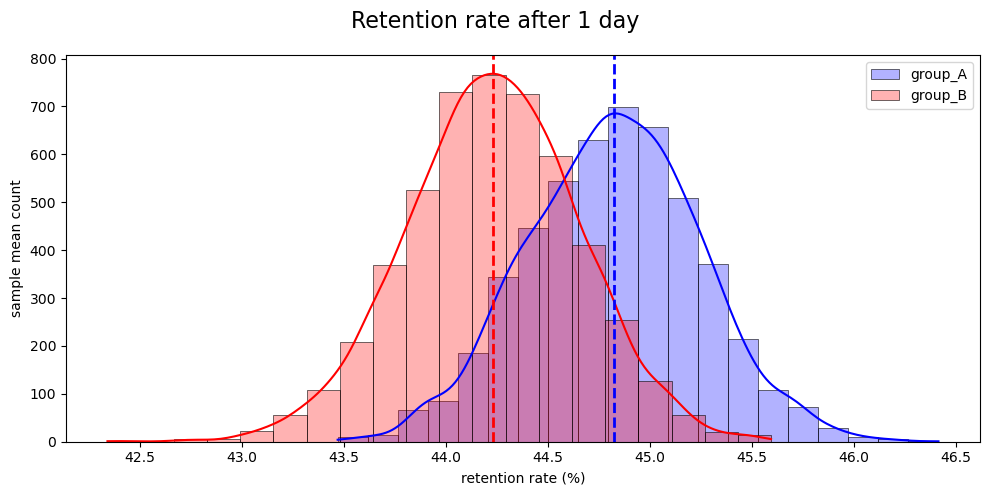

In [48]:
# plot for 1 day retention

plot_grid(bootstrap_A_r1, bootstrap_B_r1, 'Retention rate after 1 day', 'group_A','group_B')

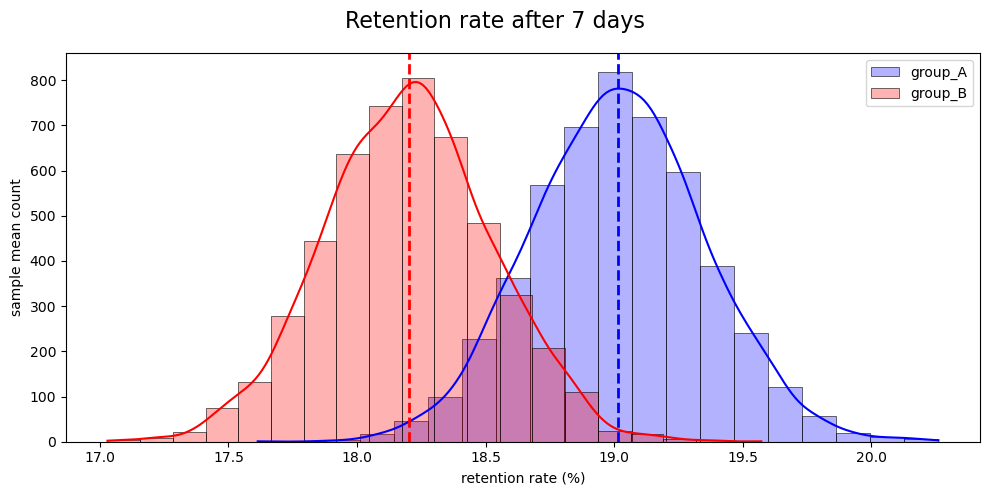

In [49]:
# plot for 7 day retention

plot_grid(bootstrap_A_r7, bootstrap_B_r7, 'Retention rate after 7 days', 'group_A','group_B')

## The end. Thank you for reading

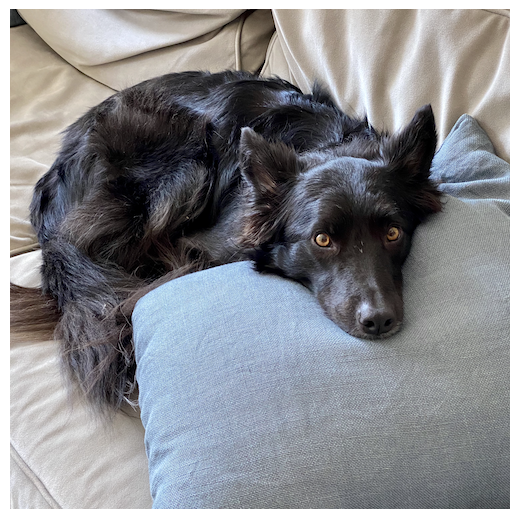

In [231]:
sns.dogplot()